# EE2100
# TUTORIAL 9 : Q1
## Raj Patil 
## CS18BTECH11039

In [155]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [156]:
ds =  pd.read_csv("PaintedTurtles.txt",delimiter="\t",header=0)
ds.columns = [col.strip() for col in ds.columns]
ds.drop('sex',axis=1,inplace=True)
ds.head()

,length,width,height
0,98,81,38
1,103,84,38
2,103,86,42
3,105,86,40
4,109,88,44


# Preprocessing

## scaling from -1 to 1

In [157]:
for col in ds.columns:
    min_col = min(ds[col])
    max_col = max(ds[col])
    if min_col == max_col:
        ds[col] = 0.
        continue
    ds[col] = 2*(max_col - ds[col])/(max_col - min_col) -  1 

## de-meaning

In [158]:
ds= ds - ds.mean()
ds.mean()

length    2.312965e-17
width    -2.775558e-17
height   -7.170190e-17
dtype: float64

## initial variances

In [159]:
ds.var()

length    0.237810
width     0.191055
height    0.275155
dtype: float64

# PCA

## Covariance Matrix

In [160]:
cvm = np.zeros((3,3))

for datum in range(len(ds)):
    x_i = np.array(ds.iloc[datum])
    cvm += np.outer(x_i,x_i)

cvm /= len(ds)


# do note the minor error from the actual variances (see diagonal)
cvm

array([[0.23285516, 0.20418655, 0.24162946],
       [0.20418655, 0.18707423, 0.21565194],
       [0.24162946, 0.21565194, 0.26942274]])

### sorting the eigenvectors according to the eigenvalues 

In [161]:
eig_vals, eig_vecs = np.linalg.eig(cvm)
eig_vecs = {eig_vals[i]:eig_vecs[:,i] for i in range(3)}
eig_vecs

{0.6744205881692321: array([-0.58238094, -0.52036509, -0.62454193]),
 0.004489756182392136: array([-0.68424507,  0.72859322,  0.0309936 ]),
 0.010441792927022514: array([-0.43890903, -0.44538982,  0.78037605])}

In [162]:
eig_vals = sorted(eig_vals,reverse=True)
principal_components = {f'PC {i+1}': eig_vecs[eig_vals[i]] for i in range(3) }

sorted_eigen_vals

{'PC 1': array([-0.58238094, -0.52036509, -0.62454193]),
 'PC 2': array([-0.43890903, -0.44538982,  0.78037605]),
 'PC 3': array([-0.68424507,  0.72859322,  0.0309936 ])}

In [163]:
transformer = np.array([sorted_eigen_vals[f"PC {i+1}"] for i in range(3)]).T
# np.matmul(transformer.T, x_i) will give the transformed datapoint
transformer

array([[-0.58238094, -0.43890903, -0.68424507],
       [-0.52036509, -0.44538982,  0.72859322],
       [-0.62454193,  0.78037605,  0.0309936 ]])

## Building the transformed dataset 

In [164]:
ds_pca = ds.copy()
ds_pca.columns = [f"PC {i+1}" for i in range(3)]
for datum in range(len(ds)):
    ds_pca.iloc[datum] = np.matmul(transformer.T,ds.iloc[datum]) 

In [165]:
ds_pca.head(),ds_pca.tail()

(       PC 1      PC 2      PC 3
 0 -0.954398 -0.094179 -0.055912
 1 -0.831236  0.004147 -0.049826
 2 -0.639213 -0.160231 -0.107822
 3 -0.689549 -0.041783 -0.071365
 4 -0.442061 -0.164360 -0.064195,
         PC 1      PC 2      PC 3
 43 -0.091450  0.030861  0.068913
 44 -0.009886  0.097836  0.026125
 45 -0.013964  0.092928  0.067540
 46  0.066669  0.075506  0.114478
 47  0.358547  0.237474 -0.098656)

## checking variances 

In [166]:
ds_pca.var()
# order checks out

PC 1    0.688770
PC 2    0.010664
PC 3    0.004585
dtype: float64

# Plots

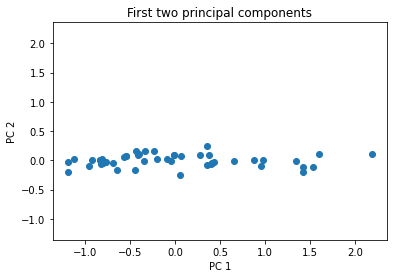

In [167]:
plt.scatter(ds_pca["PC 1"],ds_pca["PC 2"])
plt.xlabel("PC 1")
plt.ylabel("PC 2")
# setting same limits to exaggerate variance differences
plt.ylim(plt.xlim())
plt.title("First two principal components")
plt.show()